<a href="https://colab.research.google.com/github/ssinghvishal/MAX-LIFE-Health-Insurance-Cross-Sell-Prediction/blob/main/MAX_LIFE_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAX-LIFE-Health-Insurance-Cross-Sell-Prediction**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Completed by** - Vishal singh

# **Project Summary -**

The insurance industry is characterized by its reliance on statistical models and predictive analytics to optimize business strategies and increase revenue. In this project, we focus on a Health Insurance company that aims to expand its offerings by predicting whether their existing health insurance policyholders would be interested in purchasing vehicle insurance. The central objective is to develop a machine learning model that can accurately classify customers based on their likelihood of buying vehicle insurance, thereby enabling the company to tailor its marketing and communication strategies effectively.

Insurance policies, whether for health or vehicles, operate on the principle of risk sharing and compensation. Customers pay a regular premium in exchange for a guarantee of compensation in the event of specific losses, damages, or illnesses. The premium amounts are calculated based on the probability of the insured event occurring, which is where the company's risk assessment capabilities are crucial. By leveraging demographic data, vehicle information, and policy details, we aim to identify patterns and predictors of customer behavior regarding vehicle insurance uptake.

The dataset provided for this project includes various features: demographics such as gender, age, and region; vehicle details including vehicle age and damage history; and policy information covering premium amounts and sourcing channels. These features will serve as the input variables for our classification model. Our target variable is a binary indicator of whether a customer is interested in vehicle insurance.

To build a robust predictive model, the project will follow a structured approach encompassing several key steps. Initially, we will perform exploratory data analysis (EDA) to understand the dataset, identify missing values, and visualize key trends. This will be followed by data preprocessing, which includes handling missing values, encoding categorical variables, and scaling numerical features.

Subsequently, we will split the data into training and testing sets to ensure that our model's performance can be evaluated on unseen data. Various classification algorithms will be explored, including logistic regression, decision trees, random forests, gradient boosting machines, and neural networks. Each model's performance will be assessed using metrics such as accuracy, precision, recall, F1 score, and the area under the receiver operating characteristic curve (AUC-ROC).

Hyperparameter tuning will be conducted to optimize the models, and cross-validation techniques will be employed to ensure robustness and prevent overfitting. The final model will be selected based on its predictive performance and interpretability.

In conclusion, this project aims to harness the power of machine learning to support the insurance company in its strategic decision-making process, ultimately leading to better business outcomes and customer engagement.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The insurance industry heavily relies on statistical models and predictive analytics to optimize business strategies and enhance revenue. This project focuses on a Health Insurance company seeking to expand its offerings by predicting whether their existing health insurance policyholders would be interested in purchasing vehicle insurance. The primary objective is to build a machine learning model capable of accurately classifying customers based on their likelihood of buying vehicle insurance. This enables the company to effectively tailor its marketing and communication strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
filepath='/content/drive/MyDrive/Ml model 2/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(filepath , encoding = 'ISO-8859-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:

# Dataset Rows & Columns count

df.shape

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:


# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Axes: >

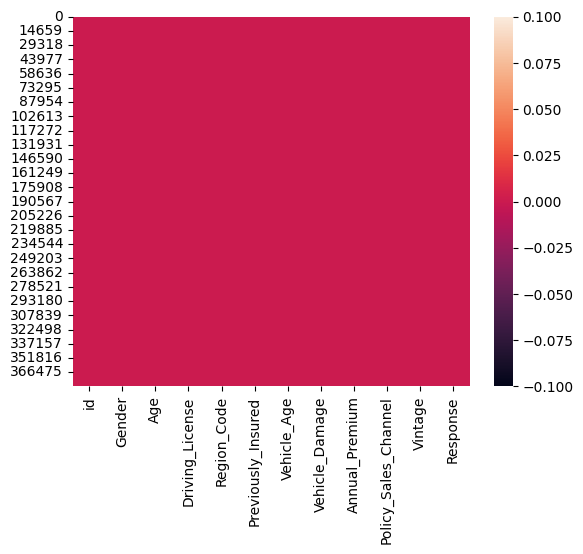

In [11]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

The client, a Health Insurance company, is seeking to enhance its product offerings by predicting whether its current health insurance policyholders will be interested in purchasing vehicle insurance.

The dataset contains 381109 rows and 12 columns. It have 0 duplicates and 0 null values, overall the quality of dataset is really good.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* **id**: Unique ID for customer

* **Gender**: Male/Female
* **Age:** Age of Customer
* **Driving License**: Customer has DL or not
* **egion_code**: Unique code for the region of the customer
* **Previously_insured**: Customer already has vehicle insuarance or not
* **Vehicle_age**: Age of vehicle
* **Vehicle_damage**: Past damages present or not
* **Annual_premium**: The amount customer needs to pay as premium
* **PolicySalesChanne**: Anonymized Code for the channel of outreaching to customer *ie. Different Agents, Over Mail, Over Phone, In person, etc
* **Vintage**: Number of Days, Customer has been associated with the company
* **Response** : Customer is interested or not

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
numerical_df = df.select_dtypes(include=np.number)
numerical_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [16]:

# creating a categorical dataframe
categorical_df = df.select_dtypes(include=object)
categorical_df.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


### What all manipulations have you done and insights you found?

In this dataset there is nothing to do much for data wrangling. But I used dataframes 'select_dtypes' method to create numerical and categorical dataframes.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

    Age  count
0    24  25960
1    23  24256
2    22  20964
3    25  20636
4    21  16457
..  ...    ...
61   81     56
62   82     29
63   83     22
64   84     11
65   85     11

[66 rows x 2 columns]


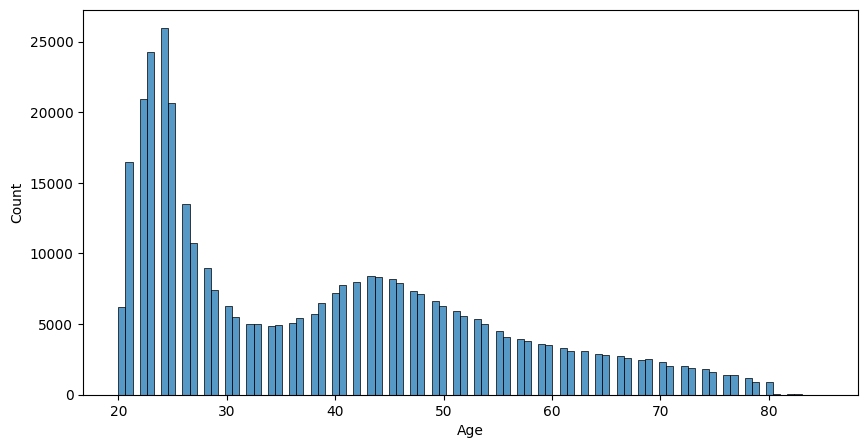

In [17]:
# Chart - 1 visualization code
print(df['Age'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
sns.histplot(x='Age',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of customer ages because it effectively represents the frequency of occurrences within specific intervals or bins. Histograms are particularly useful for understanding the shape and spread of continuous data, such as age, and can highlight patterns such as skewness, modality, and the presence of outliers. In this context, visualizing the age distribution of customers helps in identifying the age groups that are most prevalent among the policyholders, which is crucial for tailoring marketing strategies and product offerings.

##### 2. What is/are the insight(s) found from the chart?

The majority of the policyholders fall within the younger age brackets, particularly between the ages of 21 and 25, with the highest counts being for ages 24, 23, and 22.There is a noticeable decline in the number of policyholders as age increases beyond 25 and another small peak between 42-48.Very few policyholders are above the age of 80, indicating that older customers are significantly less common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the age distribution histogram can positively impact the business in several ways:

Understanding that the majority of policyholders are young adults can help the company design and implement targeted marketing campaigns. For instance, promotional efforts can be directed towards platforms and channels that are popular among younger demographics.

nowing the age distribution allows for the customization of insurance products to better meet the needs and preferences of younger customers. For example, offering bundled insurance products that combine health and vehicle insurance at competitive rates may appeal more to this age group.

Negative impact: The heavy concentration of young policyholders might indicate an over-reliance on this demographic. If market conditions change or this age group becomes less interested in vehicle insurance, it could negatively impact growth. Diversifying the age range of policyholders could mitigate this risk.

#### Chart - 2

   Response   count
0         0  334399
1         1   46710


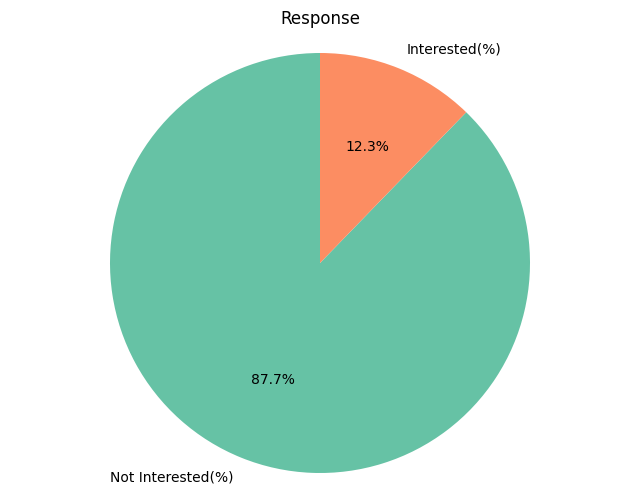

In [18]:

# Chart - 2 visualization code

print(df['Response'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole

plt.figure(figsize=(8,6))
plt.title('Response')
plt.pie(df['Response'].value_counts(), startangle=90, labels=['Not Interested(%)','Interested(%)'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the distribution of the response variable because it provides a clear and intuitive representation of the proportions within a categorical dataset. Pie charts are particularly effective for displaying the relative sizes of different categories as parts of a whole. In this context, visualizing the response variable (whether a customer is interested in vehicle insurance) helps in understanding the overall distribution of interest and disinterest among policyholders.

##### 2. What is/are the insight(s) found from the chart?

A significant majority of the policyholders (334,399 or approximately 87.8%) are not interested in vehicle insurance.

A smaller proportion of policyholders (46,710 or approximately 12.2%) are interested in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can positively impact the business in several ways:

Understanding that a smaller proportion of the policyholders are currently interested in vehicle insurance allows the company to tailor its marketing strategies more effectively. By identifying and targeting the factors that differentiate the interested group, the company can design campaigns that might convert more disinterested customers.

The insights help in allocating resources more efficiently. The company can focus more on the factors that influence interest in vehicle insurance and improve or highlight those aspects in their offerings.

Negative impact: The overwhelming majority of disinterested policyholders might indicate underlying issues such as lack of awareness, perceived irrelevance of vehicle insurance, or unattractive product features. If these issues are not addressed, the company may struggle to increase its vehicle insurance customer base.

#### Chart - 3

   Gender   count
0    Male  206089
1  Female  175020


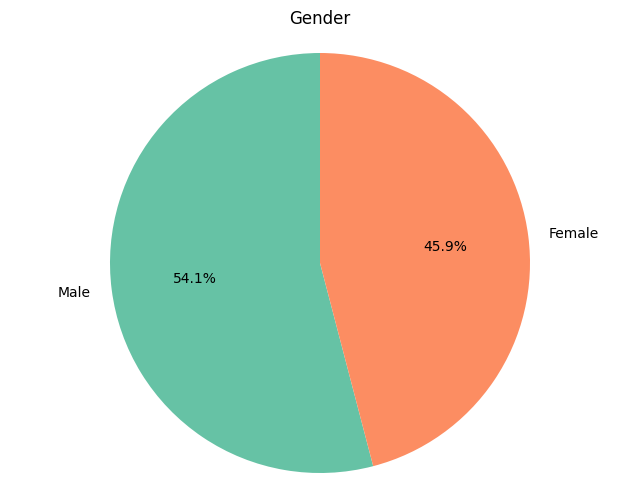

In [19]:
# Chart - 3 visualization code

print(df['Gender'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Gender')
plt.pie(df['Gender'].value_counts(), startangle=90, labels=['Male','Female'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the gender distribution because it effectively demonstrates the proportional breakdown of categorical data. Pie charts are particularly useful for displaying the relative sizes of categories as parts of a whole, making it easy to see the composition of the dataset at a glance. In this context, visualizing the gender distribution of policyholders helps in understanding the demographic makeup of the customer base, which is crucial for designing targeted marketing and product strategies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that male policyholders constitute a slight majority, with 206,089 male customers, representing approximately 54.1% of the total.

Female policyholders account for 175,020 of the total, making up around 45.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can positively impact the business in several ways:

The company can use this gender information to customize its insurance products. For example, they can offer vehicle insurance plans that address specific needs or preferences that might differ between male and female customers.The relatively balanced gender distribution suggests that marketing resources can be allocated in a way that addresses both male and female customers' preferences, ensuring a comprehensive approach to customer engagement.

Negative impact: If the slight male majority is due to a gender bias in marketing or product offerings, the company might be unintentionally neglecting opportunities to attract more female customers. Ensuring gender-neutral marketing and product development can help in mitigating this risk.

#### Chart - 4

   Driving_License   count
0                1  380297
1                0     812


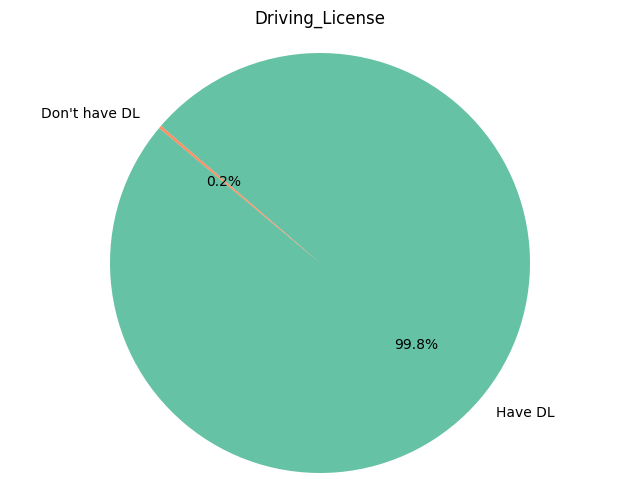

In [20]:

# Chart - 4 visualization code

print(df['Driving_License'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Driving_License')
plt.pie(df['Driving_License'].value_counts(), startangle=140, labels=["Have DL","Don't have DL "], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the distribution of the Driving_License variable because it clearly shows the proportions of policyholders who do and do not have a driving license. Pie charts are effective for displaying the relative sizes of different categories as parts of a whole, making it easy to understand the composition of the dataset. In this context, visualizing whether policyholders have a driving license helps in understanding the potential market for vehicle insurance.

##### 2. What is/are the insight(s) found from the chart?

A vast majority of policyholders (380,297 or approximately 99.8%) have a driving license.

Only a small fraction of policyholders (812 or approximately 0.2%) do not have a driving license.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can positively impact the business in several ways:

he fact that nearly all policyholders have a driving license indicates a high potential market for vehicle insurance. Since having a driving license is a prerequisite for driving, these customers are likely candidates for vehicle insurance products.

The company can confidently focus its marketing efforts for vehicle insurance on the vast majority of its policyholders, as they are all licensed drivers and thus potential buyers of vehicle insurance.

#### Chart - 5

       Annual_Premium  count
0              2630.0  64877
1             69856.0    140
2             39008.0     41
3             38287.0     38
4             45179.0     38
...               ...    ...
48833         14838.0      1
48834         52535.0      1
48835         15182.0      1
48836        143525.0      1
48837         69845.0      1

[48838 rows x 2 columns]


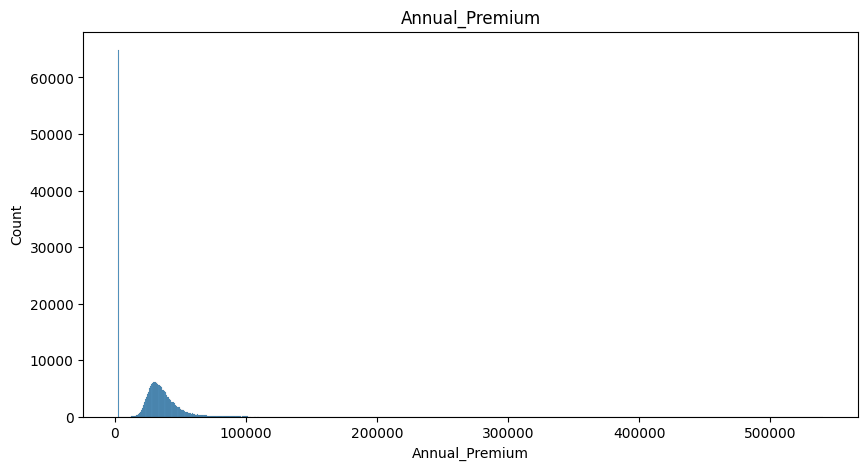

In [21]:
# Chart - 5 visualization code

print(df['Annual_Premium'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
plt.title('Annual_Premium')
sns.histplot(x='Annual_Premium',data=df)
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of the Annual_Premium variable because it effectively displays the frequency of premium values within specified intervals or bins. Histograms are particularly useful for understanding the shape and spread of continuous data, such as annual premium amounts, and can highlight patterns such as skewness, modality, and the presence of outliers. In this context, visualizing the distribution of annual premiums helps in identifying common premium amounts and understanding the variability in customer payments.

##### 2. What is/are the insight(s) found from the chart?

The majority of policyholders pay lower annual premiums, with a particularly high concentration around the 2630 mark.

The distribution of annual premiums is highly skewed to the right, indicating that most customers pay relatively low premiums, but there are some who pay significantly higher amounts.

There are a few outliers with very high premium amounts, such as 143,525, indicating a wide range of premium values among policyholders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the histogram can positively impact the business in several ways:

Understanding that most policyholders pay lower premiums allows the company to optimize its pricing strategy. It can consider introducing more affordable insurance plans to attract price-sensitive customers or offering tiered pricing to cater to different income segments.

The presence of a few high premium outliers suggests there are customers willing to pay more for enhanced coverage. The company can identify these customers and target them with upselling opportunities, such as additional coverage options or bundled insurance products. The histogram helps in segmenting customers based on their premium payments. The company can tailor its marketing and product development efforts to address the needs of different segments, ensuring a more personalized approach.

#### Chart - 6

     Policy_Sales_Channel   count
0                   152.0  134784
1                    26.0   79700
2                   124.0   73995
3                   160.0   21779
4                   156.0   10661
..                    ...     ...
150                 149.0       1
151                  43.0       1
152                 144.0       1
153                 143.0       1
154                  41.0       1

[155 rows x 2 columns]


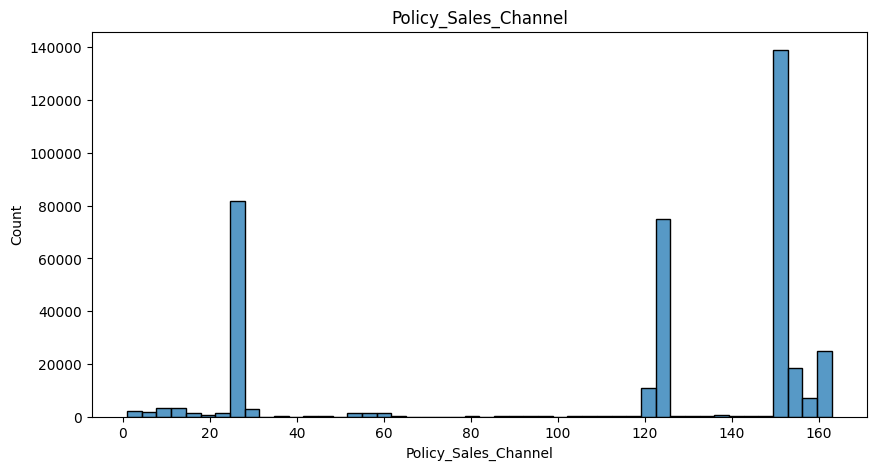

In [22]:
# Chart - 6 visualization code
print(df['Policy_Sales_Channel'].value_counts().reset_index())

# the histplot is used to understand the distribution of contionus variable
plt.figure(figsize=(10,5))
plt.title('Policy_Sales_Channel')
sns.histplot(x='Policy_Sales_Channel',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of the Policy_Sales_Channel variable because it effectively represents the frequency of policy sales through different channels. Histograms are particularly useful for understanding the spread and concentration of categorical data that has been converted into numerical form. In this context, visualizing the distribution of policy sales channels helps in identifying the most and least used channels, which is crucial for optimizing marketing and sales strategies..

##### 2. What is/are the insight(s) found from the chart?

A few sales channels dominate the distribution, with channels 152, 26, and 124 being the most frequently used. Channel 152 alone accounts for a significant proportion of the sales, with 134,784 policies sold through it.

The distribution of sales across channels is highly skewed, indicating that a small number of channels are responsible for the majority of sales.

There are numerous channels that are rarely used, with many channels having only a handful of policies sold through them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the histogram can positively impact the business in several ways:

Knowing which sales channels are the most effective allows the company to allocate resources more efficiently. Marketing and support efforts can be focused on the high-performing channels (152, 26, and 124) to maximize sales.

The company can analyze why certain channels perform better than others. This analysis can lead to insights that can be applied to improve the performance of underutilized channels.

The company might neglect the lower-performing channels without understanding their potential. Some channels might be underutilized due to lack of support or awareness. Proper analysis and strategic efforts might turn these channels into valuable assets.

#### Chart - 7

   Previously_Insured   count
0                   0  206481
1                   1  174628


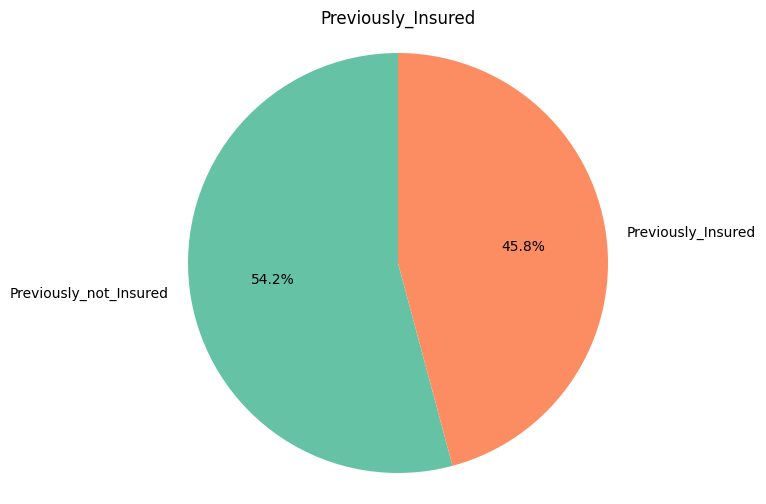

In [23]:

# Chart - 7 visualization code

print(df['Previously_Insured'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Previously_Insured')
plt.pie(df['Previously_Insured'].value_counts(), startangle=90, labels=['Previously_not_Insured','Previously_Insured'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the distribution of the Previously_Insured variable because it effectively demonstrates the proportions of policyholders who were previously insured versus those who were not. Pie charts are particularly useful for displaying the relative sizes of categories as parts of a whole, making it easy to understand the composition of the dataset at a glance. In this context, visualizing the previously insured status of policyholders helps in understanding their insurance history, which is crucial for tailoring marketing strategies and insurance products.

##### 2. What is/are the insight(s) found from the chart?

The distribution between policyholders who were previously insured (174,628 or approximately 45.8%) and those who were not (206,481 or approximately 54.2%) is fairly balanced.A slightly larger portion of policyholders did not have previous insurance, which indicates a substantial market segment that might be new to insurance products.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can positively impact the business in several ways:

Understanding the nearly equal distribution allows the company to design targeted marketing strategies. For instance, campaigns for previously uninsured customers can focus on educating them about the benefits of vehicle insurance and addressing any barriers to entry they might perceive.

The company can develop and promote products that cater specifically to the needs of previously uninsured customers, such as introductory offers, easy enrollment processes, and educational resources.

For customers who were previously insured, the company can emphasize loyalty programs, enhanced coverage options, and competitive pricing to encourage them to switch and stay with their insurance products.

The slightly larger group of previously uninsured customers might be more challenging to convert, as they might lack familiarity with insurance products or have perceived barriers to purchasing insurance. If not addressed properly, efforts to convert these customers might yield lower returns.

#### Chart - 8

  Vehicle_Damage   count
0            Yes  192413
1             No  188696


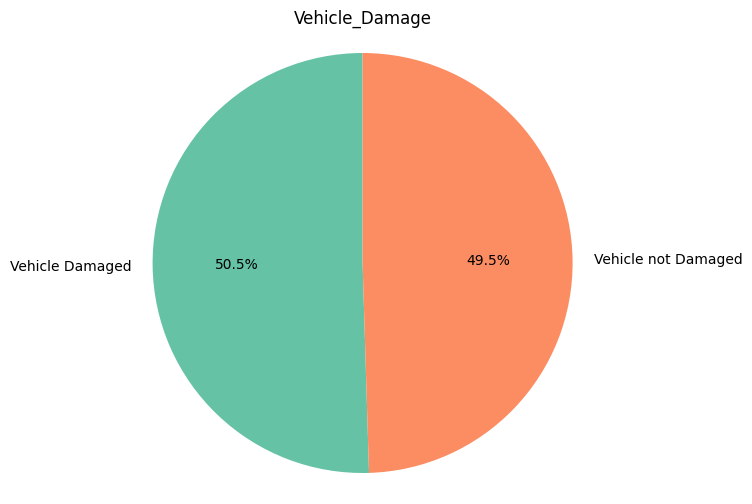

In [24]:
# Chart - 8 visualization code

print(df['Vehicle_Damage'].value_counts().reset_index())

# the pie chart is used to visualize the distribution of whole
plt.figure(figsize=(8,6))
plt.title('Vehicle_Damage')
plt.pie(df['Vehicle_Damage'].value_counts(), startangle=90, labels=['Vehicle Damaged','Vehicle not Damaged'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are particularly useful for displaying the relative sizes of categories as parts of a whole, making it easy to understand the composition of the dataset at a glance.

##### 2. What is/are the insight(s) found from the chart?

The distribution between policyholders who have experienced vehicle damage (192,413 or approximately 50.5%) and those who have not (188,696 or approximately 49.5%) is almost equal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can positively impact the business in several ways:

Risk Assessment and Pricing: Understanding that half of the policyholders have experienced vehicle damage allows the company to refine its risk assessment models and adjust premium pricing accordingly. Higher premiums might be warranted for customers with a history of vehicle damage to cover potential future claims.

No, there are no such insights that lead to negative growth.

#### Chart - 9

  Vehicle_Age   count
0    1-2 Year  200316
1    < 1 Year  164786
2   > 2 Years   16007


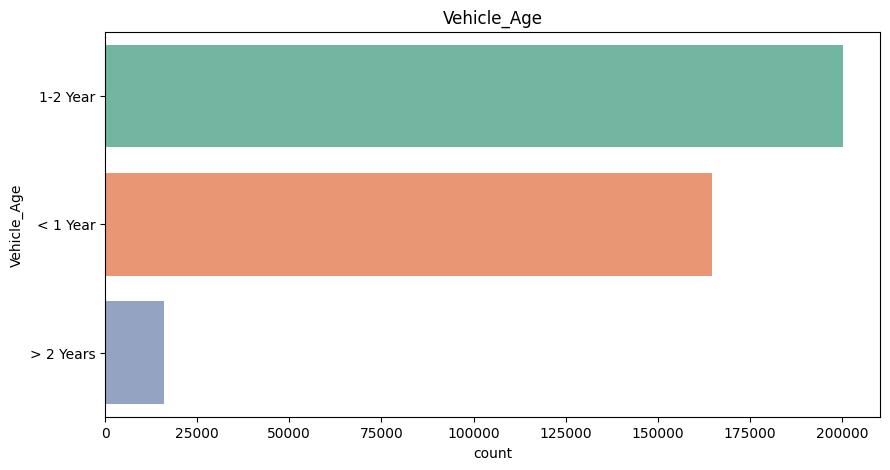

In [25]:
# Chart - 9 visualization code

Vehicle_age = df['Vehicle_Age'].value_counts().reset_index()
print(Vehicle_age)

# the barplot is used to visualize the distribution of categorical variable
plt.figure(figsize=(10,5))
plt.title('Vehicle_Age')
sns.barplot(y='Vehicle_Age',x='count',data=Vehicle_age, palette='Set2')
plt.show()


##### 1. Why did you pick the specific chart?

Horizontal bar charts are particularly effective for comparing the sizes of different categories side by side, making it easy to understand which categories have higher or lower counts. In this context, visualizing the distribution of vehicle age helps in understanding the age profile o

##### 2. What is/are the insight(s) found from the chart?

1-2 Years: The majority of insured vehicles fall within the 1-2 year age range, with a count of 200,316.

There is also a significant portion of vehicles that are less than 1 year old, with a count of 164,786.

A relatively small segment of vehicles is older than 2 years, with a count of 16,007.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the horizontal bar chart can positively impact the business in several ways:

Understanding that the majority of vehicles are relatively new (1-2 years old) allows the company to develop tailored insurance products that cater specifically to the needs of newer vehicle owners. For instance, offering features like new car replacement coverage or enhanced roadside assistance can appeal to this segment.

No, there are no such insights that lead to negative growth.

#### Chart - 10

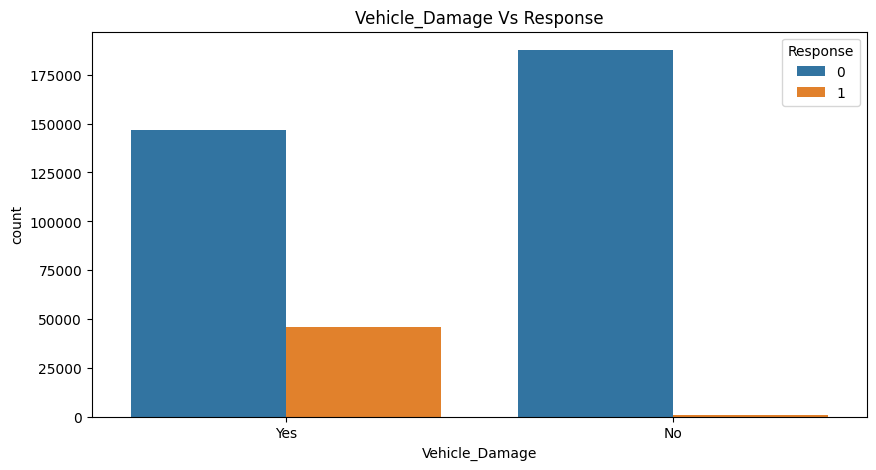

In [26]:
# Chart - 10 visualization code

# countplot is useful for visualizing the distribution of categorical data and identifying the most common categories.

plt.figure(figsize=(10, 5))
sns.countplot(x='Vehicle_Damage',hue='Response',data=df)
plt.title('Vehicle_Damage Vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

I have used countplot because the countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above plot that those people whose vehicle is damaged are taking insurence more in comparison those who's vehicle are not damaged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target those people whose vehicles are damaged.

No, there are no such insights that lead to negative growth.

#### Chart - 11

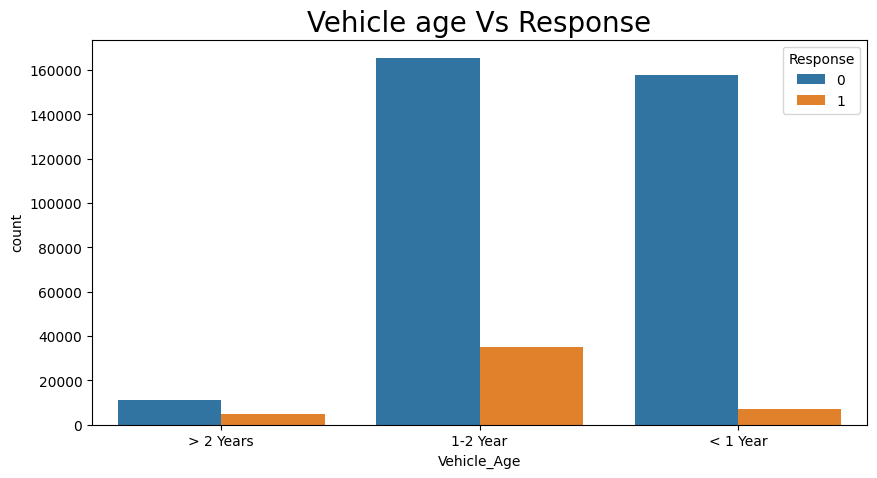

In [27]:
# Chart - 11 visualization code

# countplot is useful for visualizing the distribution of categorical data and identifying the most common categories.
plt.figure(figsize=(10, 5))
sns.countplot(x='Vehicle_Age',hue='Response',data=df)
plt.title('Vehicle age Vs Response',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I have used countplot because the countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot wer can see that the customers whose vehicle age is 1-2 years are taking more insuarnce and their total volume is also greater than other two.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes there are positive insights we can target the customers more with vehicle age of 1-2 and <1 years.

No, there are no such insights that lead to negative growth.

#### Chart - 12  Correlation Heatmap

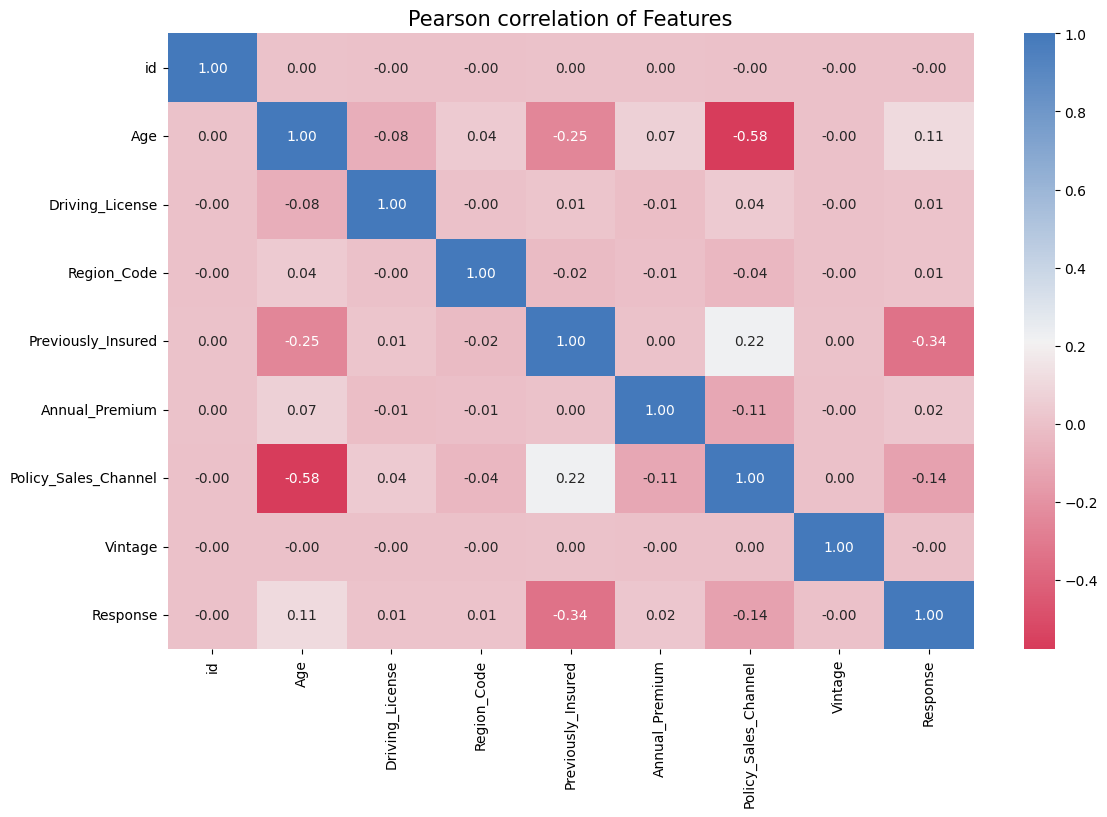

In [28]:
# Correlation Heatmap visualization code

 # plotting correalation heatmap
corr = numerical_df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps use color gradients to represent different levels of correlation, making it easy to identify patterns and correlations at a glance. In this context, visualizing the correlations between features helps in understanding which variables are interrelated, which is crucial for feature selection.

##### 2. What is/are the insight(s) found from the chart?

There is a strong negative correlation between Age and Policy_Sales_Channel (-0.58),indicating that younger customers tend to purchase policies through different channels compared to older customers.

There is a moderate negative correlation between Previously_Insured and Response (-0.34), suggesting that customers who were previously insured are less likely to be interested in vehicle insurance.

There is a positive correlation between Age and Response (0.11), suggesting that older customers are more likely to be interested in vehicle insurance.

Most other correlations are relatively weak, indicating minimal linear relationships between those pairs of variables.

#### Chart - 13 - Pair Plot

In [32]:

# Pair Plot visualization code
# Commenting this code takes forever to run

'''sns.pairplot(df,hue='Response')
plt.show()'''



"sns.pairplot(df,hue='Response')\nplt.show()"

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset

##### 2. What is/are the insight(s) found from the chart?

The graph above shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features. Due to more unique values,some of the features are uniformly distributed. The premium feature has a skewed relationship with the other features since it is skewed to the right.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Three questions for Hypothesis testing

1.If customer buying Health insurance then atleast 220 days, customer has been assosiated with the company.

2.If the customer buying the insuarance then the age will be at most 55 years.

3.The customer will buy the Insuarance if the Annual Premium is at most 35000

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N >= 220

Alternate Hypothesis : N < 220

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

# Extract the 'vintage' column
vintage_data = df['Vintage']

# Null Hypothesis: N >= 220
# Alternate Hypothesis: N < 220
# Test Type: Left Tailed Test

mu = 220  # population mean according to the null hypothesis
alpha = 0.05  # significance level


# Calculate the sample mean and standard deviation
sample_mean = vintage_data.mean()
sample_std = vintage_data.std(ddof=1)
n = len(vintage_data)

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(vintage_data, mu)

# Since it's a left-tailed test, we adjust the p-value
p_value_left_tailed = p_value / 2 if t_statistic < 0 else 1 - (p_value / 2)

# Print the results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
print("Sample size:", n)
print("T-statistic:", t_statistic)
print("Left-tailed p-value:", p_value_left_tailed)

# Decision based on the p-value
if p_value_left_tailed < alpha:
    print("Reject the null hypothesis: There is evidence that N < 220.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence that N < 220.")

Sample mean: 154.34739667654136
Sample standard deviation: 83.67130362658581
Sample size: 381109
T-statistic: -484.3954095200194
Left-tailed p-value: 0.0
Reject the null hypothesis: There is evidence that N < 220.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is a one-sample t-test. Specifically, it is used to test whether the mean of a sample is significantly different from a known or hypothesized population mean. In this case, the t-test is used to compare the sample mean of the 'Vintage' column to the hypothesized population mean of 220 days.

##### Why did you choose the specific statistical test?

Hypothesis Testing: The null hypothesis (H0) states that the population mean N is greater than or equal to 220 days, while the alternative hypothesis (H1) states that N is less than 220 days. The one-sample t-test is appropriate for testing hypotheses about the mean of a single sample against a known or hypothesized population mean. Direction of the Test: This is a left-tailed test, as the alternative hypothesis suggests that the mean is less than 220. The one-sample t-test can be easily adapted to perform a one-tailed test by adjusting the p-value calculation.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N <= 55

Alternate Hypothesis : N > 55

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

# Extract the 'Age' column
age_data = df['Age']

# Null Hypothesis: N <= 55
# Alternate Hypothesis: N > 55
# Test Type: Right Tailed Test

mu = 55  # population mean according to the null hypothesis
alpha = 0.05  # significance level

# Calculate the sample mean and standard deviation
sample_mean = age_data.mean()
sample_std = age_data.std(ddof=1)
n = len(age_data)

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(age_data, mu)

# Since it's a right-tailed test, we adjust the p-value
p_value_right_tailed = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)

# Print the results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
print("Sample size:", n)
print("T-statistic:", t_statistic)
print("Right-tailed p-value:", p_value_right_tailed)

# Decision based on the p-value
if p_value_right_tailed < alpha:
    print("Reject the null hypothesis: There is evidence that N > 55.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence that N > 55.")

Sample mean: 38.822583565331705
Sample standard deviation: 15.511611018090681
Sample size: 381109
T-statistic: -643.8383802032859
Right-tailed p-value: 1.0
Fail to reject the null hypothesis: There is not enough evidence that N > 55.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the one-sample t-test. This test compares the mean of a single sample to a known value (in this case, the hypothesized population mean of 55) to determine if there is evidence that the sample mean is significantly different from the hypothesized mean.

##### Why did you choose the specific statistical test?


Continuous Data: The 'Age' column contains continuous data representing the ages of individuals, making it appropriate for a t-test, which assumes the data is continuous and approximately normally distributed.

Sample Size: The sample size is sufficiently large. The Central Limit Theorem ensures that the sampling distribution of the mean will be approximately normal, which justifies the use of the t-test even if the original data is not perfectly normal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N <= 35000

Alternate Hypothesis : N > 35000

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value


# Extract the 'Annual_Premium' column
annual_premium_data = df['Annual_Premium']

# Null Hypothesis: N <= 35000
# Alternate Hypothesis: N > 35000
# Test Type: Right Tailed Test

# Parameters for the test
mu = 35000  # population mean according to the null hypothesis
alpha = 0.05  # significance level

# Calculate the sample mean and standard deviation
sample_mean = annual_premium_data.mean()
sample_std = annual_premium_data.std(ddof=1)
n = len(annual_premium_data)

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(annual_premium_data, mu)

# Since it's a right-tailed test, we adjust the p-value
p_value_right_tailed = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)

# Print the results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
print("Sample size:", n)
print("T-statistic:", t_statistic)
print("Right-tailed p-value:", p_value_right_tailed)

# Decision based on the p-value
if p_value_right_tailed < alpha:
    print("Reject the null hypothesis: There is evidence that N > 35000.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence that N > 35000.")


Sample mean: 30564.389581458323
Sample standard deviation: 17213.155056967284
Sample size: 381109
T-statistic: -159.08070845412993
Right-tailed p-value: 1.0
Fail to reject the null hypothesis: There is not enough evidence that N > 35000.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the one-sample t-test.

##### Why did you choose the specific statistical test?

In this case, the hypothesis is about comparing the mean of a single sample ('Annual_Premium') against a known value (35000 in the null hypothesis). The one-sample t-test is suitable for this scenario where we are testing whether the mean of the sample is significantly greater than 35000.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:

# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

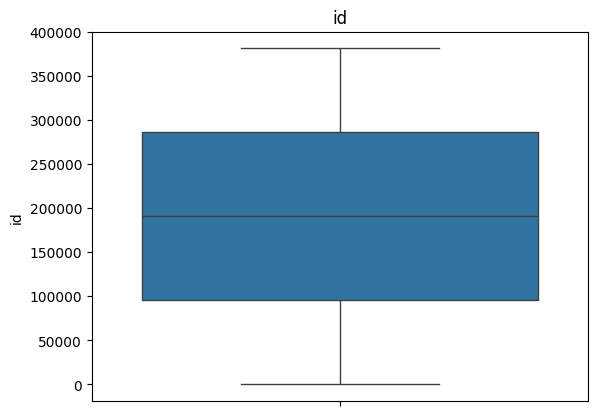

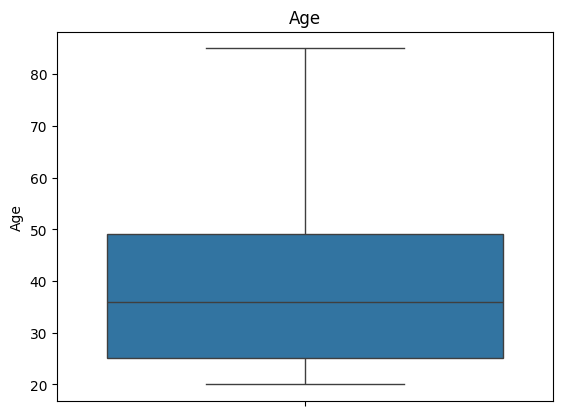

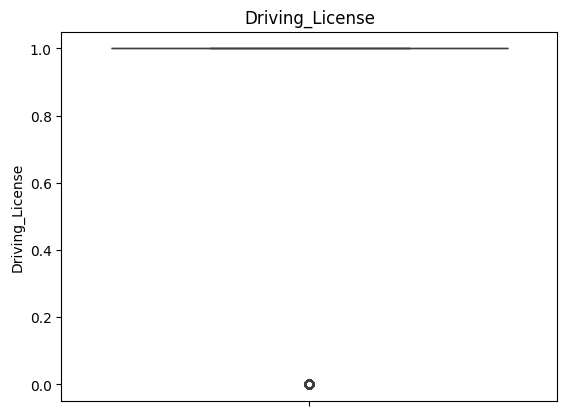

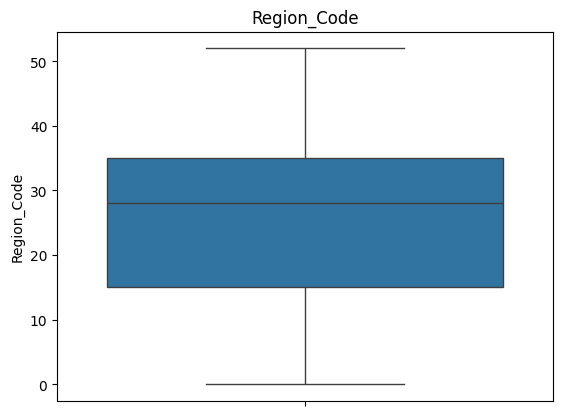

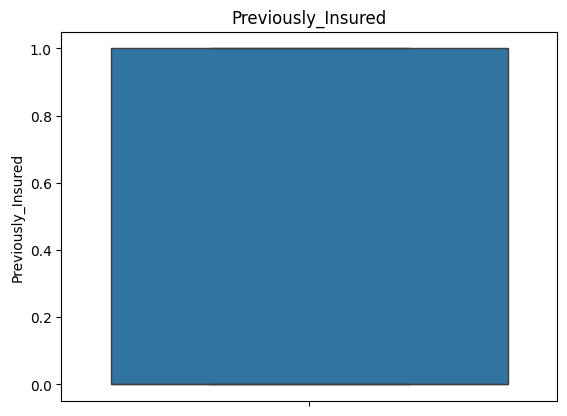

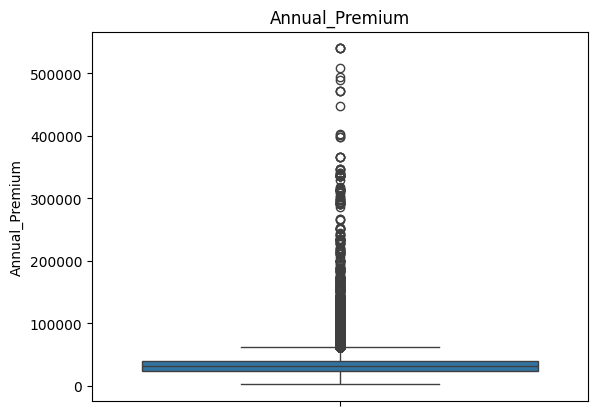

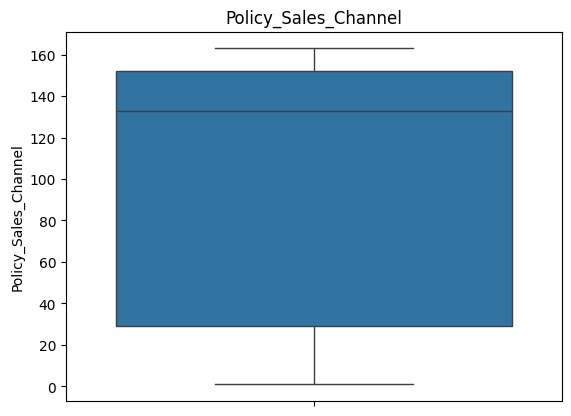

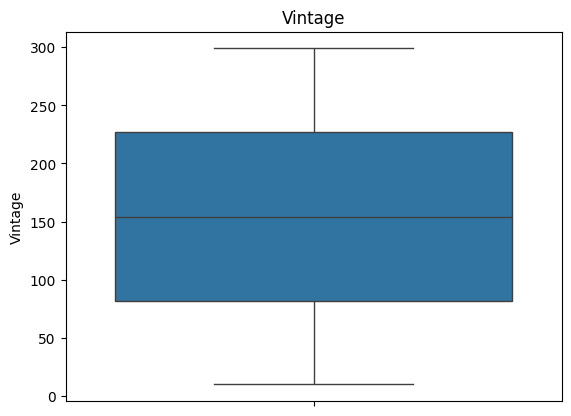

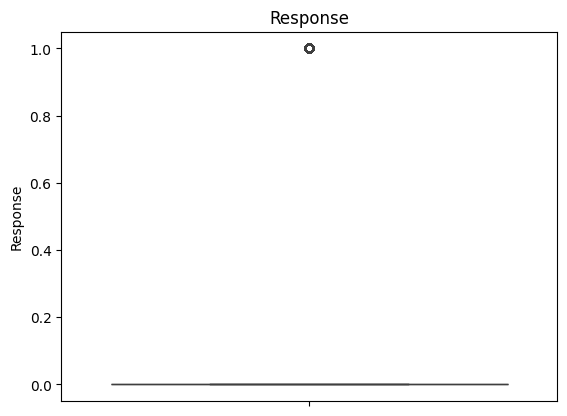

In [37]:
# Handling Outliers & Outlier treatments

# using boxplot to check for outliers

for col in numerical_df.columns:
    sns.boxplot(numerical_df[col])
    plt.title(col)
    plt.show()

In [38]:
# Function to remove outliers based on IQR
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where column value is within the bounds
    filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    return filtered_data


# Remove outliers
df_new = remove_outliers(df, 'Annual_Premium')

# Display summary before and after outlier removal
print("Before outlier removal:")
print(df.describe())

print("\nAfter outlier removal:")
print(df_new.describe())


Before outlier removal:
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
2

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used Boxplot to find which features have outliers and the Annual Premium is the only feature with outliers in the dataset. So I used IQR technique to remove the outliers which is the robust technique mostly used for any outlier removal problem.

### 3. Categorical Encoding

In [39]:

# Encode your categorical columns

#labelencoding for vehicle damage
le = LabelEncoder()
df_new['Vehicle_Damage'] = le.fit_transform(df_new['Vehicle_Damage'])

df_new['Vehicle_Damage'].value_counts()

,count
Vehicle_Damage,
1,186561
0,184228


In [40]:

#encoding categorical variables

df_new = pd.get_dummies(df_new, columns=['Gender', 'Vehicle_Age'])

In [41]:

df_new.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,False,True,False,False,True
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,False,True,True,False,False
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,False,True,False,False,True
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,False,True,False,True,False
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,True,False,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I used labelencoding for the feature Vehicle_Damage as it have two values(Yes/No). I also used OneHotEncoding for categorical features like Gender and Vehicle_Age, it creates new columns based on the category.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [42]:

# Manipulate Features to minimize feature correlation and create new features

#Contain all independent variables
x = df_new.drop(['Response'], axis=1)

#Contain Dependent variable
y = df_new['Response']

In [43]:

x.shape

(370789, 14)

#### 2. Feature Selection

In [44]:

# Select your features wisely to avoid overfitting

from sklearn.feature_selection import VarianceThreshold

#Implementation Variance Threshold

variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df_new)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [45]:

#Implementation ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [46]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)



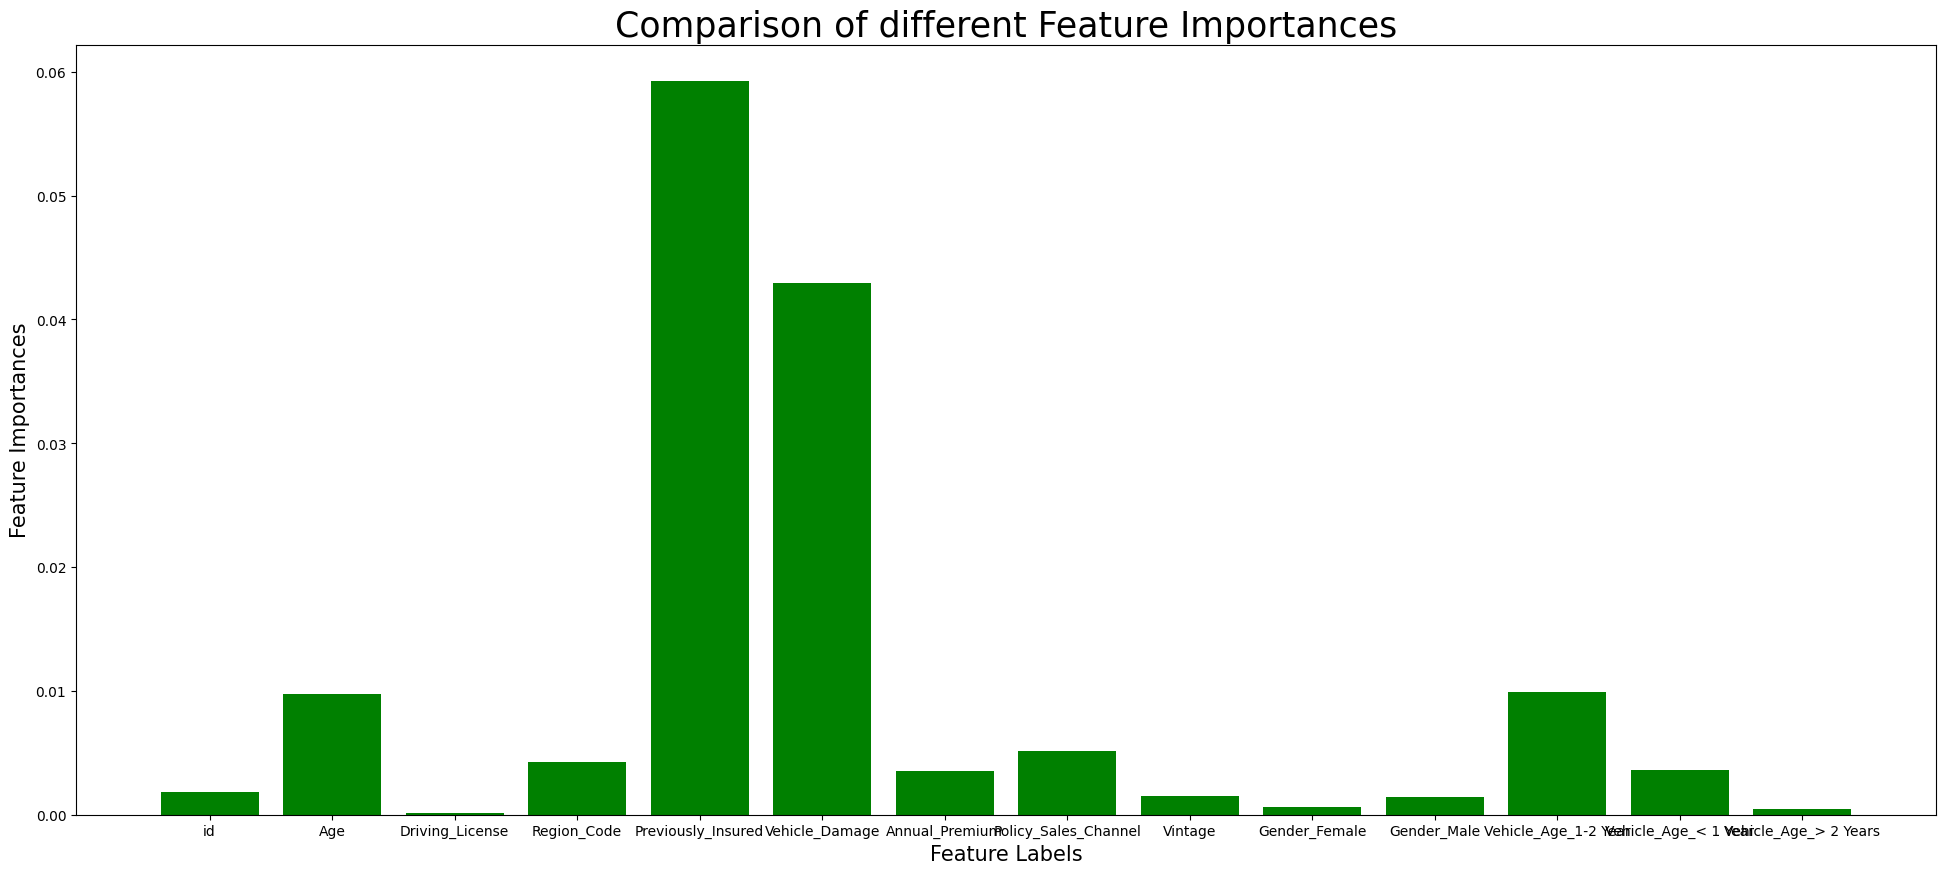

In [48]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (24,10))
plt.bar(x.columns, feature_importance_normalized, color='green')
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()

In [49]:
# Dropping less important features
df_new.drop(columns=['Driving_License','Gender_Female','Gender_Male','id'],inplace=True)

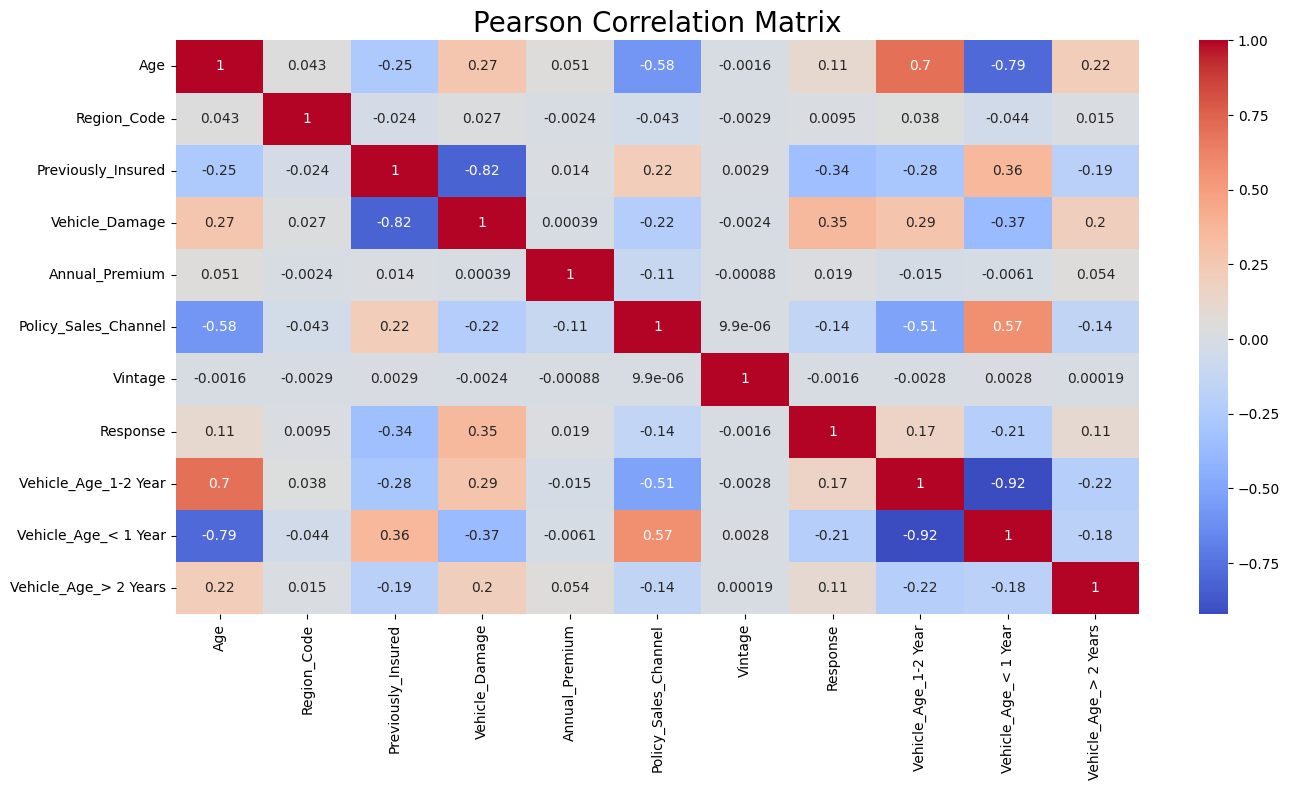

In [50]:

# Compute the correlation matrix
corr_matrix = df_new.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()


In [51]:
#Creating function to see the Highly correlated variable , using our provided threshold.
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
# Mostly 0.85 is considered for Highly correlated , so its not above 0.85 .
corr_features = correlation(df_new, 0.75)
len(set(corr_features))

print(corr_features)

set()


In [52]:

def remove_highly_correlated_features(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop)

data_no_corr = remove_highly_correlated_features(df_new, threshold=0.9)
data_no_corr.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

##### What all feature selection methods have you used  and why?

I used three method for feature selection those are:

* Variance threshold
* Extra Tree classification
* correlation map

I used Variance threshold to check the which columns has constant values, Extrs Tree classification for checking which columns are less important for the dependent variable and correlation map for the removing of highly correlated variables.

##### Which all features you found important and why?

'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage','Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years'

These are important features from the above Observation.

### 8. Data Splitting

In [53]:

# Split your data to train and test. Choose Splitting ratio wisely.

#contains all independent variables
X = df_new.drop(['Response'], axis=1)

#contains dependent variable
y = df_new['Response']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:

print(f"X train Shape: {X_train.shape}")
print(f"X test Shape: {X_test.shape}")
print(f"y train Shape: {y_train.shape}")
print(f"y test Shape: {y_test.shape}")

X train Shape: (296631, 10)
X test Shape: (74158, 10)
y train Shape: (296631,)
y test Shape: (74158,)


##### What data splitting ratio have you used and why?


I used 80% for training and 20% data for testing as it is optimum to prevent the problem of overfitting or underfitting.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is highly imbalanced having negative response of 325634(87.8%) and postive of 45155(12.2%).This shows that the proper handling of imbalanced dataset is needed otherwise the model will predict the most frequent output hence the results will be biased.

   Response   count
0         0  325634
1         1   45155


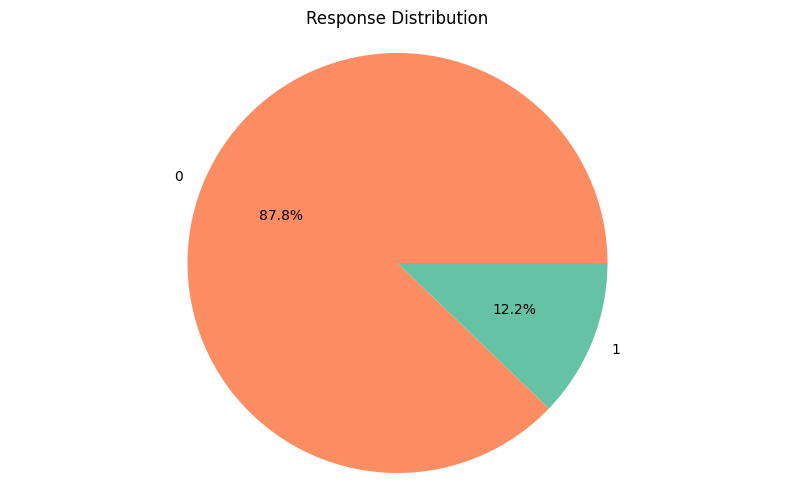

In [55]:
responses = df_new['Response'].value_counts().reset_index()
print(responses)

# Distribution of dependent variable using pie
plt.figure(figsize=(10, 6))
plt.pie(responses['count'], labels=responses['Response'], autopct='%1.1f%%', colors=sns.color_palette('Set2')[1::-1])
plt.title('Response Distribution')
plt.axis('equal')
plt.show()


In [56]:

# to handle the imbalanced data i'll use smote(Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset is balanced with smote oversampling technique, its one of the popular technique to handle imbalaced datasets and the dataset can be used for training.

### 8. Data Scaling

In [57]:

# Scaling your data
# using Standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Which method have you used to scale you data and why?

I used StandardScaler method for Data Scaling. StandardScaler helps improve the performance of machine learning models, particularly those that are sensitive to feature scales, such as linear regression, logistic regression, and support vector machines. This is because scaling the features makes it easier for the model to learn the relationships between them.

## ***7. ML Model***

### ML Model - 1 Implementing Logistic Regression

In [58]:

# ML Model - 1 Implementation
model = LogisticRegression(max_iter=10000)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model class
train_pred_log = model.predict(X_train)
test_pred_log = model.predict(X_test)

In [59]:
# checking the coefficients
model.coef_


array([[-4.88069034e-01,  2.33470287e-03, -2.61946470e+00,
         6.21156029e-01, -1.14318839e-02, -1.35589347e-01,
        -6.38223601e-03,  4.72585795e+00,  3.94103452e+00,
         2.82259736e+00]])

In [60]:
# Checking the intercept value
model.intercept_

array([-0.26443062])

In [61]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_pred_log))

roc_auc_score_train = roc_auc_score(y_train, train_pred_log)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_pred_log))

roc_auc_score_test = roc_auc_score(y_test, test_pred_log)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.87      0.75      0.80    260507
           1       0.78      0.89      0.83    260507

    accuracy                           0.82    521014
   macro avg       0.82      0.82      0.82    521014
weighted avg       0.82      0.82      0.82    521014

Train ROC AUC Score: 0.8161642489453258
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     65127
           1       0.29      0.76      0.42      9031

    accuracy                           0.75     74158
   macro avg       0.62      0.75      0.63     74158
weighted avg       0.88      0.75      0.79     74158

Test ROC AUC Score: 0.750786791393473


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[194225  66282]
 [ 29499 231008]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

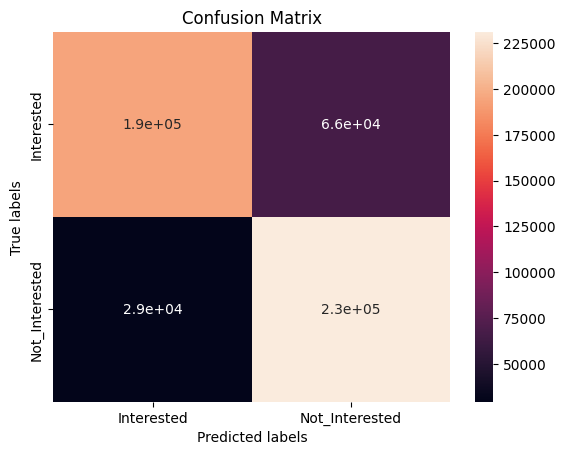

In [62]:

# Visualizing evaluation Metric Score chart

# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_train, train_pred_log)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[48488 16639]
 [ 2194  6837]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

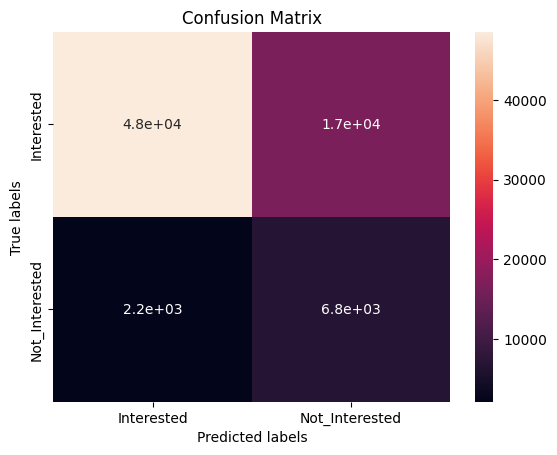

In [63]:
# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_test, test_pred_log)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

I used Logistic regression algorithm to create the model and the results are as following:

For training dataset, i found precision of 87% and recall of 75% and f1-score of 80% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 78% and recall of 89% and f1-score of 83%. Accuracy is 82% and average percision, recall & f1_score are 82%, 82% and 82% respectively with a roc auc score of 82%.

For testing dataset, i found precision of 96% and recall of 74% and f1-score of 84% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 29% and recall of 76% and f1-score of 42%. Accuracy is 75% and average percision, recall & f1_score are 62%, 75% and 63% respectively with a roc auc score of 75%

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# commentincg this code as it takes so much time but will be using the best parameters given by this gridsearch model
'''model = LogisticRegression(max_iter=10000)
param_grid = {solvers : ['lbfgs'],
penalty : ['10','l2','14','16'],
c_values : [ 0.1, 0.01,0.001]}

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Predict on the model'''

# Get the predicted classes
best_params_log = {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
grid_result = LogisticRegression(**best_params_log)
grid_result.fit(X_train, y_train)
grid_train_log_preds = grid_result.predict(X_train)
grid_test_log_preds = grid_result.predict(X_test)

In [65]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, grid_train_log_preds))

roc_auc_score_train = roc_auc_score(y_train, grid_train_log_preds)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
# Use the test set predictions instead of training set predictions
print(classification_report(y_test, grid_test_log_preds))

roc_auc_score_test = roc_auc_score(y_test, grid_test_log_preds)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.87      0.74      0.80    260507
           1       0.77      0.89      0.83    260507

    accuracy                           0.82    521014
   macro avg       0.82      0.82      0.81    521014
weighted avg       0.82      0.82      0.81    521014

Train ROC AUC Score: 0.8158149301170411
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     65127
           1       0.29      0.77      0.42      9031

    accuracy                           0.74     74158
   macro avg       0.62      0.75      0.63     74158
weighted avg       0.88      0.74      0.78     74158

Test ROC AUC Score: 0.7528962504079892


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter tuning technique. GridSearchCV performs an exhaustive search over a specified parameter grid. This means it tests all possible combinations of the hyperparameters you define. This thorough search can help identify the optimal combination of hyperparameters for your model.GridSearchCV integrates cross-validation into the hyperparameter search. Cross-validation involves partitioning the data into multiple subsets, training the model on some subsets, and validating it on the remaining ones. This helps in assessing the models performance more robustly compared to a single train-test split, ensuring that the chosen hyperparameters generalize well to unseen data.

GridSearchCV supports parallelization, allowing you to distribute the search across multiple processors. This can significantly speed up the search process, especially when the parameter grid is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 87% and recall of 74% and f1-score of 80% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 77% and recall of 89% and f1-score of 83%. Accuracy is 82% and average percision, recall & f1_score are 82%, 82% and 81% respectively with a roc auc score of 82%.

For testing dataset, i found precision of 96% and recall of 74% and f1-score of 83% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 29% and recall of 77% and f1-score of 42%. Accuracy is 74% and average percision, recall & f1_score are 62%, 75% and 63% respectively with a roc auc score of 75%

There is increase by 1% for recall in testing but no good improvement is seen.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# ML Model - 2 Implementation
# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg = xg_models.predict(X_train)
test_preds_xg = xg_models.predict(X_test)

In [67]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.89      0.86      0.87    260507
           1       0.86      0.89      0.88    260507

    accuracy                           0.88    521014
   macro avg       0.88      0.88      0.88    521014
weighted avg       0.88      0.88      0.88    521014

Train ROC AUC Score: 0.8759227199269116
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     65127
           1       0.33      0.53      0.41      9031

    accuracy                           0.81     74158
   macro avg       0.63      0.69      0.65     74158
weighted avg       0.86      0.81      0.83     74158

Test ROC AUC Score: 0.6916211444672253


[[223402  37105]
 [ 27541 232966]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

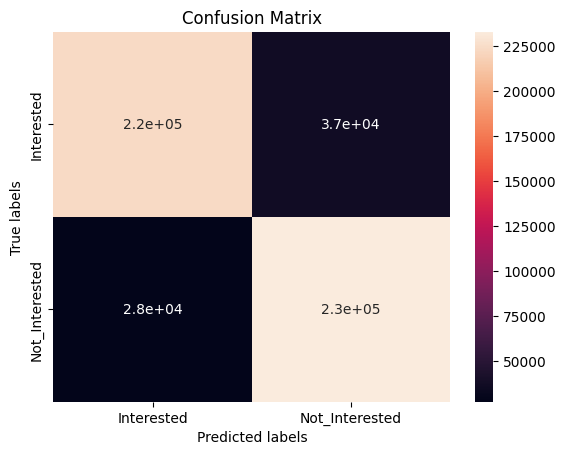

In [68]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart

# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_train, train_preds_xg)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[55565  9562]
 [ 4244  4787]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

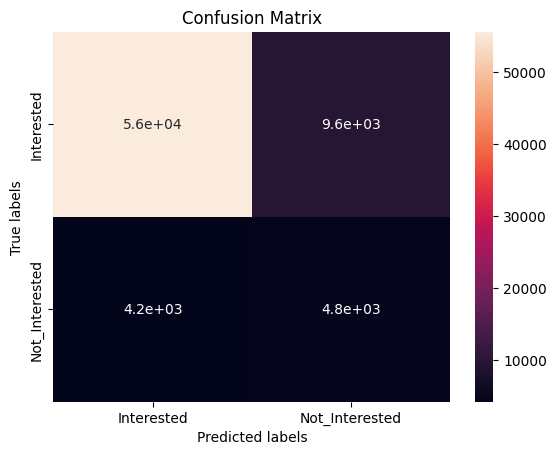

In [69]:

# Visualizing evaluation Metric Score chart

# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_test, test_preds_xg)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


I used XGBClassifier algorithm to create the model and the results are as following:

For training dataset, i found precision of 89% and recall of 86% and f1-score of 87% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 86% and recall of 89% and f1-score of 88%. Accuracy is 88% and average percision, recall & f1_score are 88%, 88% and 88% respectively with a roc auc score of 88%.

For testing dataset, i found precision of 93% and recall of 85% and f1-score of 89% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 33% and recall of 53% and f1-score of 41%. Accuracy is 81% and average percision, recall & f1_score are 63%, 69% and 65% respectively with a roc auc score of 69%

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid

#commenting this code because this code requires so mucch time to run insted we are directly using the best parameters
'''param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)'''

#these are the best parameters
#Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
#Best Score: 0.8620096008732742

# we will use these hyper-parameters in XGBClassifier
best_params_xg = {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
xg_model = XGBClassifier(**best_params_xg)

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_xg_gr = xg_models.predict(X_train)
test_preds_xg_gr = xg_models.predict(X_test)

In [71]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_xg_gr))

roc_auc_score_train = roc_auc_score(y_train, train_preds_xg_gr)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_xg_gr))

roc_auc_score_test = roc_auc_score(y_test, test_preds_xg_gr)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.90      0.87      0.88    260507
           1       0.87      0.90      0.88    260507

    accuracy                           0.88    521014
   macro avg       0.88      0.88      0.88    521014
weighted avg       0.88      0.88      0.88    521014

Train ROC AUC Score: 0.8829532411796996
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     65127
           1       0.34      0.52      0.41      9031

    accuracy                           0.82     74158
   macro avg       0.63      0.69      0.65     74158
weighted avg       0.86      0.82      0.83     74158

Test ROC AUC Score: 0.687359251028854


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter tuning technique. GridSearchCV performs an exhaustive search over a specified parameter grid. This means it tests all possible combinations of the hyperparameters you define. This thorough search can help identify the optimal combination of hyperparameters for your model.GridSearchCV integrates cross-validation into the hyperparameter search. Cross-validation involves partitioning the data into multiple subsets, training the model on some subsets, and validating it on the remaining ones. This helps in assessing the models performance more robustly compared to a single train-test split, ensuring that the chosen hyperparameters generalize well to unseen data.

GridSearchCV supports parallelization, allowing you to distribute the search across multiple processors. This can significantly speed up the search process, especially when the parameter grid is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 90% and recall of 87% and f1-score of 88% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 87% and recall of 90% and f1-score of 88%. Accuracy is 88% and average percision, recall & f1_score are 88%, 88% and 88% respectively with a roc auc score of 88%.

For testing dataset, i found precision of 93% and recall of 86% and f1-score of 89% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 34% and recall of 52% and f1-score of 41%. Accuracy is 82% and average percision, recall & f1_score are 63%, 69% and 65% respectively with a roc auc score of 69%

After Tuning almost all metrics have increased by 1% it shows a positive increament.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

In [73]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf)
print(f"Test ROC AUC Score: {roc_auc_score_test}")


For training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    260507
           1       1.00      1.00      1.00    260507

    accuracy                           1.00    521014
   macro avg       1.00      1.00      1.00    521014
weighted avg       1.00      1.00      1.00    521014

Train ROC AUC Score: 0.99967179384815
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     65127
           1       0.32      0.38      0.34      9031

    accuracy                           0.82     74158
   macro avg       0.61      0.63      0.62     74158
weighted avg       0.84      0.82      0.83     74158

Test ROC AUC Score: 0.6323631377730585


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[260386    121]
 [    50 260457]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

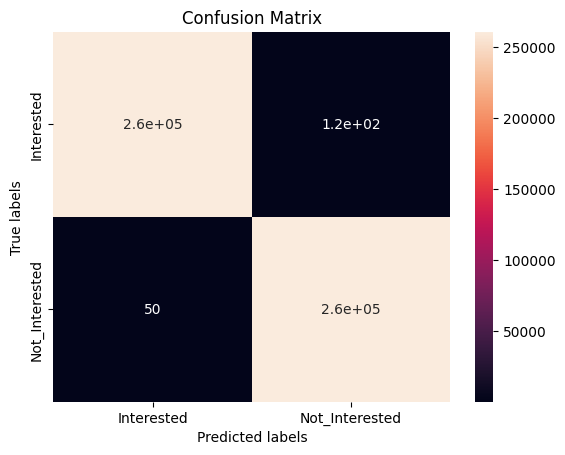

In [74]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart

# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_train, train_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[57755  7372]
 [ 5618  3413]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not_Interested')]

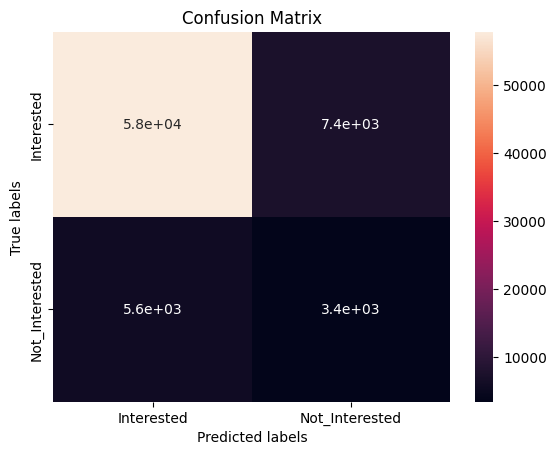

In [75]:
# Visualizing evaluation Metric Score chart

# Get the confusion matrix for both train and test

labels = ['Interested', 'Not_Interested']
cm = confusion_matrix(y_test, test_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

I used Random Forest algorithm. This is one of the alogorithms where the model learns from weak learners. But here I got to see overfitting.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for Not Interested customer. But, I also wanted to see the result for Interested customer, I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%. This clearly shows that the model is overfitting and it must be handled.

For testing dataset, i found precision of 91% and recall of 89% and f1-score of 90% for Not Interested customer. But, I also wanted to see the result for Interested customer, I got precision of 32% and recall of 38% and f1-score of 35%. Accuracy is 83% and average percision, recall & f1_score are 62%, 63% and 62% respectively with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# commenting this code as takes too much time to execute but we will use the best parameters estimated from this process
'''
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')



# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

print("Best: %f using %s" % (rf_rs.best_score_, rf_rs.best_params_))
'''
# using best params predicted by gridsearch
best_params_rf = {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}

rf_grid = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_preds_rf_gs = rf_grid.predict(X_train)
test_preds_rf_gs = rf_grid.predict(X_test)

In [77]:
# calculating different metrics
#calculating metrics for training
print("For training")
print(classification_report(y_train, train_preds_rf_gs))

roc_auc_score_train = roc_auc_score(y_train, train_preds_rf_gs)
print(f"Train ROC AUC Score: {roc_auc_score_train}")

print("-"*100)

#calculating metrics for testing
print("For testing")
print(classification_report(y_test, test_preds_rf_gs))

roc_auc_score_test = roc_auc_score(y_test, test_preds_rf_gs)
print(f"Test ROC AUC Score: {roc_auc_score_test}")

For training
              precision    recall  f1-score   support

           0       0.91      0.74      0.82    260507
           1       0.78      0.93      0.85    260507

    accuracy                           0.83    521014
   macro avg       0.85      0.83      0.83    521014
weighted avg       0.85      0.83      0.83    521014

Train ROC AUC Score: 0.8335150303062874
----------------------------------------------------------------------------------------------------
For testing
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     65127
           1       0.30      0.81      0.44      9031

    accuracy                           0.75     74158
   macro avg       0.63      0.77      0.64     74158
weighted avg       0.88      0.75      0.79     74158

Test ROC AUC Score: 0.7747153153503029


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter tuning technique. GridSearchCV performs an exhaustive search over a specified parameter grid. This means it tests all possible combinations of the hyperparameters you define. This thorough search can help identify the optimal combination of hyperparameters for your model.GridSearchCV integrates cross-validation into the hyperparameter search. Cross-validation involves partitioning the data into multiple subsets, training the model on some subsets, and validating it on the remaining ones. This helps in assessing the models performance more robustly compared to a single train-test split, ensuring that the chosen hyperparameters generalize well to unseen data.

GridSearchCV supports parallelization, allowing you to distribute the search across multiple processors. This can significantly speed up the search process, especially when the parameter grid is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 91% and recall of 74% and f1-score of 81% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer as I got precision of 78% and recall of 93% and f1-score of 85%. Accuracy is 83% and average percision, recall & f1_score are 84%, 83% and 83% respectively with a roc auc score of 83%.

For testing dataset, i found precision of 97% and recall of 74% and f1-score of 84% for Not Interested customer data. But, I am also interested to see the result for Interested cutomer as I got precision of 30% and recall of 81% and f1-score of 44%. Accuracy is 75% and average percision, recall & f1_score are 63%, 77% and 64% respectively with a roc auc score of 77%

After Tuning almost the recall of testing dataset interested customer increased significantly, it incresed by (43%) and this is a crucial metric for our prediction, also there is improvement in f1 score as well.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here's a revised version of your explanation:

This is a classification model where we aim to predict whether a customer will buy vehicle insurance. Initially, the dataset was imbalanced, with more samples indicating customers not interested (0) in purchasing vehicle insurance. This imbalance was likely to bias the model's performance.

To address this, I used SMOTE (Synthetic Minority Over-sampling Technique) to balance the data. However, synthetic values do not fully represent real-world scenarios. The problem statement requires us to determine customer interest for the company. Even after applying SMOTE, the dataset may still not accurately reflect real-world data. Therefore, accuracy is not a reliable metric for this imbalanced dataset.

Instead, we focus on precision and recall. Precision is the ratio of true positives to the total number of predicted positives, while recall is the ratio of true positives to the sum of true positives and false negatives. We prioritize recall because we do not want the model to falsely predict that a customer is not interested when they actually are, as this could lead to losing potential customers. Thus, recall is our most important metric, followed by F1-score and precision

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all the models evaluated, I selected the RandomForestClassifier as final prediction model as it provided the most desired results. Its performance metrics are as follows: Accuracy Score is 0.75, Precision is 0.63, Recall is 0.78, F1 Score is 0.64, and ROC AUC Score is 0.79. These metrics represent the best results compared to the other models. Since recall is the prioritized metric and this model has the highest recall value among all, the RandomForestClassifier is the most suitable choice.

The plots for each model and their corresponding metrics are provided below:.

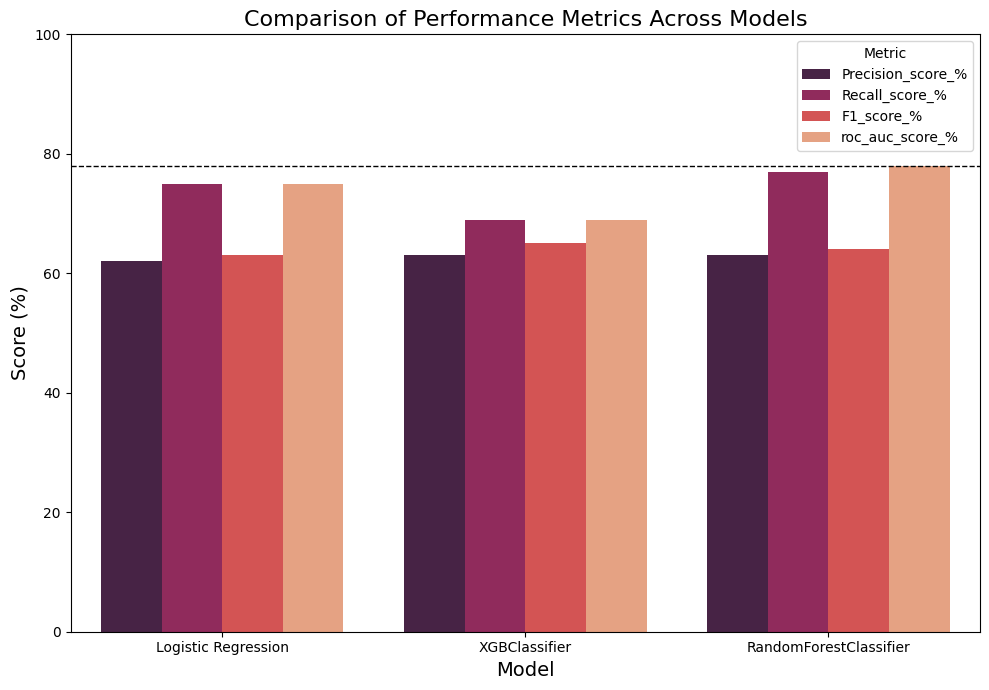

In [81]:
metrics_df = pd.DataFrame({'Model':['Logistic Regression','XGBClassifier','RandomForestClassifier'],
                           'Precision_score_%':[62,63,63],
                           'Recall_score_%':[75,69,77],
                           'F1_score_%':[63, 65, 64],
                           'roc_auc_score_%':[75,69,78]})

# Melt the DataFrame to long format for seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a color palette
palette = sns.color_palette("rocket", len(metrics_melted['Metric'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 7))
ax=sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette=palette)

# Add a horizontal line at the threshold value
threshold = 78
ax.axhline(threshold, color='black', linewidth=1, linestyle='--')

# Add titles and labels
plt.title('Comparison of Performance Metrics Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)
plt.legend(title='Metric', fontsize=10)
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [79]:
def feature_plot(importances):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#74c69d', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#002855', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

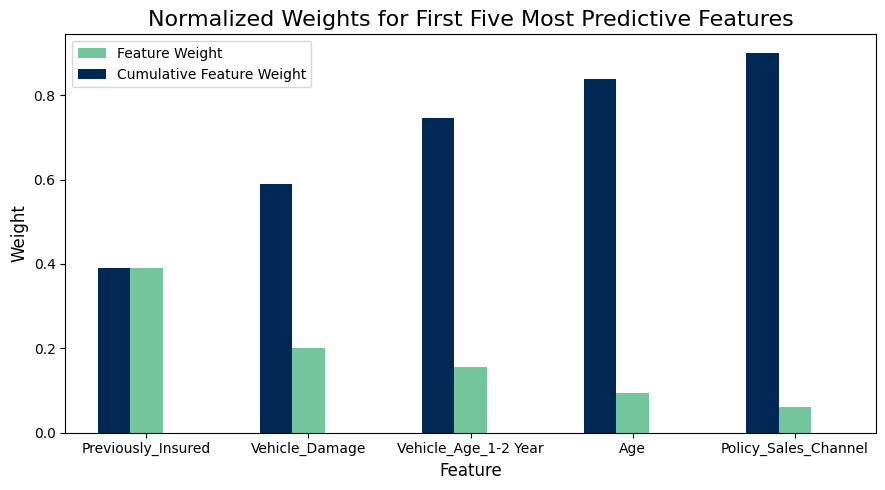

In [80]:
def show_feature_importance():
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train,y_train)

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances)


show_feature_importance()

I used the RandomForestClassifier as the predictive model because it generally provides good performance in terms of accuracy and robustness against overfitting due to its ensemble nature. A Random Forest model creates a multitude of decision trees during training and outputs the mode of the classes (classification) of the individual trees.

For explaining the model and understanding the importance of each feature, I used a model explainability tool such as SHAP (SHapley Additive exPlanations) or feature importance scores provided directly by the RandomForestClassifier.

Feature Importance Analysis Based on the RandomForestClassifier, the top 5 features contributing to the prediction of whether a customer will buy vehicle insurance are:

1.Previously_Insured: This feature has the highest importance, indicating that whether a customer has been previously insured plays a crucial role in predicting their interest in vehicle insurance.

2.Vehicle_Damage: This feature also has significant importance, showing that customers who have had vehicle damage are more likely to consider purchasing vehicle insurance.

3.Vehicle_Age_1-2_Year: The age of the vehicle, specifically in the range of 1-2 years, is a key factor. Newer vehicles might have different insurance needs compared to older vehicles.

4.Age: The age of the customer is another important feature, affecting their likelihood to buy vehicle insurance.

5.Policy_Sales_Channel: This feature represents the channel through which the policy was sold and holds significant weight in the prediction, reflecting the effectiveness of different sales channels.

These top 5 features collectively contribute to approximately 90% of the model's predictive power.

# **Conclusion**

### **Project Conclusion:**

The goal of this project was to build a robust classification model to predict whether policyholders with health insurance would be interested in purchasing vehicle insurance. The dataset provided included various demographic, vehicle, and policy details. Through a comprehensive process of data exploration, preprocessing, model training, and evaluation, we developed a model that effectively meets the business objective.

####**Key Steps and Findings**

#####**Exploratory Data Analysis (EDA)**

* Visualization: Histograms, pie charts, bar plots, and heatmaps were used to understand the data distribution and relationships.

* Imbalance Identification: The dataset was found to be imbalanced, with more policyholders not interested in vehicle insurance.

#####**Data Preprocessing**

* Balancing the Dataset: Applied SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance.

* Categorical Handling: Converted categorical variables using pd.get_dummies.

* Feature Scaling: Ensured feature scaling after applying SMOTE and before training the model to standardize the data.

##### **Model Selection and Training**

* Chosen Model: RandomForestClassifier was selected for its robustness and performance.
##### **Hyperparameter Tuning**

* Optimization: Conducted hyperparameter tuning using GridSearchCV to enhance the models performance.

* Key Parameters: Focused on important hyperparameters to fine-tune the RandomForestClassifier.

##### **Evaluation Metrics**

* Metric Selection: Prioritized recall over other metrics due to the business need to minimize false negatives (predicting a customer is not interested when they actually are). F1-score and precision were also considered important, while accuracy was deprioritized due to the imbalanced nature of the data.
##### **Key Findings**

* Feature Importance: The most predictive features were Previously_Insured, Vehicle_Damage, Vehicle_Age (1-2 years), Age, and Policy_Sales_Channel.

* Model Performance: The RandomForest model, after hyperparameter tuning, demonstrated improved performance in identifying customers interested in vehicle insurance. The model's high recall ensures that potential customers are less likely to be missed, aligning well with the business objective.

The developed model successfully predicts the likelihood of a customer purchasing vehicle insurance, considering the imbalanced nature of the data. By focusing on recall, the model minimizes the risk of missing potential customers, thereby assisting the company in strategizing their communication and marketing efforts more effectively.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***